# GHOST - 2D linear advection equation
Solving the linear advection equation on a periodic square with a sinusoidal initial condition

In [1]:
import sys  
import numpy as np
sys.path.insert(0, '../src')
from Mesh import Mesh1D
from Solver import Solver

# read in a uniform mesh with 4 elements
mesh = Mesh1D("advection_1D", 0.0, 1.0, 4)

# define boundaries
left = np.array([1.0,0.0]) 
right = np.array([1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right],[1,2])

# define periodicity
mesh.make_periodic((1,2)) 

# set polynomial degree of discretization
p = 3

# set volume quadrature degree
volume_quadrature_degree = 2*p

# set wave speed
a = 1.0

ValueError: shapes (0,) and (1,) not aligned: 0 (dim 0) != 1 (dim 0)

Set up solver parameters defining a weak-form modal DG scheme for the linear advection equation with RK4 time-marching and an upwind numerical flux

In [2]:
params = {  "project_title": "advection_2D",
        "problem": "constant_advection",
        "initial_condition": "sine",
        "wavelength": np.ones(1),
        "wave_speed": np.ones(1),
        "upwind_parameter": 1.0,
        "integration_type": "quadrature",
        "solution_degree": 2,
        "volume_quadrature_degree": volume_quadrature_degree,
        "solution_representation": "modal",
        "form": "strong",
        "correction": "c_dg",
        "time_integrator": "rk44",
        "final_time": 1.0,
        "time_step_scale": 0.0025}

Create a `Solver` object with the parameters and mesh defined above

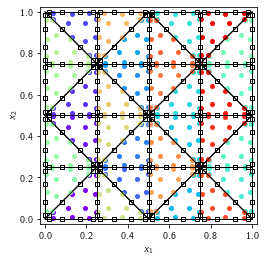

In [3]:
advection_solver = Solver(params,mesh)
advection_solver.discretization.plot()

Run `advection_solver` for one period

In [4]:
advection_solver.run(restart=False,
                     write_interval=params["final_time"]/10, print_interval=params["final_time"]/100)

Post-process and generate plots of numerical and exact solutions

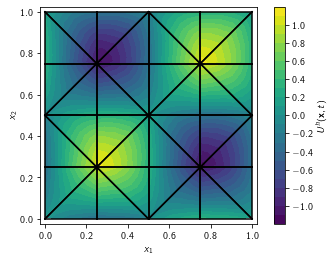

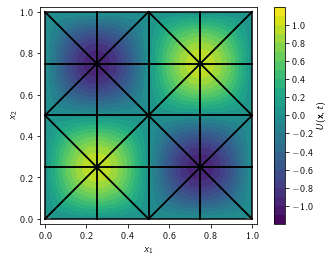

In [ ]:
advection_solver.post_process()
advection_solver.plot(plot_curves=True,plot_exact=True)